In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("student_clustering.csv")
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [3]:
#Here, to separate the iq's into two classes where 0 => iq<114, 1 otherwise

feature = np.array(df.iloc[:, 1])
target = np.array([])
for x in feature:
    if x < 39:
        target = np.append(target, 1)
    elif x < 54:
        target = np.append(target, 2)
    elif x < 69:
        target = np.append(target, 3)
    elif x < 84:
        target = np.append(target, 4)
    elif x < 114:
        target = np.append(target, 5)
    elif x < 129:
        target = np.append(target, 6)
    elif x < 144:
        target = np.append(target, 7)
    elif x < 159:
        target = np.append(target, 8)
    elif x < 179:
        target = np.append(target, 9)
    else:
        target = np.append(target, 10)
feature = feature.reshape(-1, 1)

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature, target,test_size=0.25,random_state=0)

In [50]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [51]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

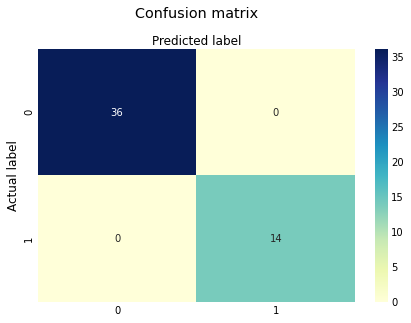

In [52]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

intercept: 2.4396262805438913
slope: [0.02736671]


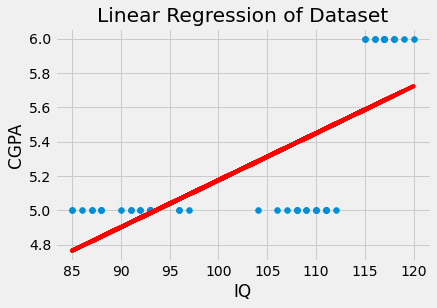

50.005744317855296 %


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg=LinearRegression()

linreg.fit(X_train,y_train)

y_predict=linreg.predict(X_test)
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)
#x=np.linspace(0,200,100)
#y=0.02736671*x+2.4396262805438913
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,color="red")
plt.title("Linear Regression of Dataset")
plt.xlabel("IQ")
plt.ylabel("CGPA")
plt.show()

r2_score=linreg.score(X_test,y_test)
print(r2_score*100,'%')

In [24]:
conda install -c conda-forge kneed

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - kneed


The following packages will be downloaded:

    package                    |            build

    ---------------------------|-----------------
    certifi-2021.10.8          |   py38haa244fe_2         146 KB  conda-forge
    conda-4.12.0               |   py38haa244fe_0         1.0 MB  conda-forge
    kneed-0.7.0                |     pyh9f0ad1d_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  kneed              conda-forge/noarch::kneed-0.7.0-pyh9f0ad1d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2022.3.29-~ --> conda-forge::ca-certific

In [25]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

kmeans = KMeans(
     init="random",
     n_clusters=4,
     n_init=10,
     max_iter=300,
     random_state=42
 )
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [29]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.labels_)
df

8.477237626556299
[[-0.6719604   0.62030356]
 [-1.24429338 -1.26080305]
 [ 0.75084754 -0.60958735]
 [ 1.16540625  1.25008684]]
4
[1 0 2 2 0 0 2 3 0 2 1 0 2 1 0 2 0 2 0 0 2 1 2 1 1 2 1 3 2 0 3 0 3 0 2 2 3
 0 1 0 1 2 2 1 3 3 2 0 3 0 1 1 3 2 3 0 0 3 0 3 0 2 2 3 1 3 2 1 0 2 0 3 2 1
 0 3 0 3 1 2 2 3 0 1 3 1 3 0 3 0 3 3 2 1 2 2 3 2 1 3 0 1 1 3 1 1 2 1 3 3 2
 3 0 0 2 3 2 0 3 1 1 0 2 3 2 1 2 0 1 2 2 0 1 1 0 3 0 1 2 2 2 1 0 1 1 3 1 3
 0 1 3 1 3 3 1 2 0 3 0 2 1 3 0 2 3 1 0 1 1 3 3 0 3 1 1 2 3 0 1 3 3 0 0 0 2
 1 2 2 3 0 2 2 1 1 2 1 3 0 0 3]


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


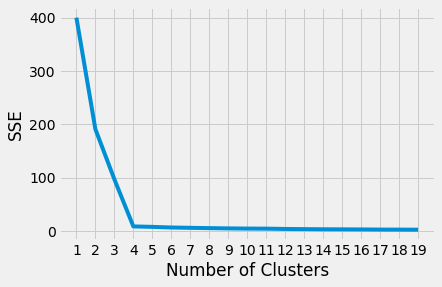

In [30]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
   }

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

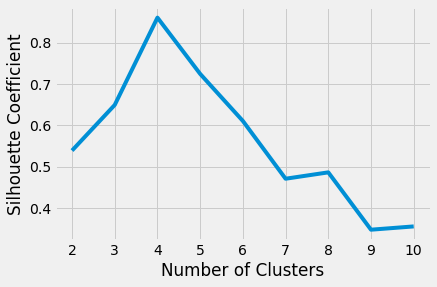

In [31]:
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
        
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()    

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
